## **Introduction:**  
#### Welcome to our project on sales forecasting using time series analysis. Time series forecasting is a powerful technique that allows us to predict future values of a target variable based on its past values. In this project, we will be working with a time series dataset consisting of a sequence of data points collected over time, where each data point represents a measurement or observation at a specific point in time.
#### Unlike other types of prediction problems, time series forecasting requires us to analyze the temporal patterns and trends in the data. The order of the data points matters, and there may be seasonality, trends, residuals, and other patterns that need to be considered in order to make accurate predictions.  
---  
## **Objective:**  
#### Our main objective is to develop a flexible and scalable framework that can be applied to a wide range of time series datasets. We will also take into account variables that can affect the target variable, such as promotions and special days. By doing so, we can train machine learning models to automatically detect and account for these variables, leading to more accurate forecasts.

#### Additionally, we will explore the relationship between ensemble techniques and forecasting error. Ensemble techniques involve combining the strengths of multiple machine learning models and techniques to achieve better forecasting performance. By studying this relationship, we can gain deeper insights into the underlying patterns and trends in the data.  
---  
## **Aim**  
#### Through this project, we aim to provide valuable insights and accurate forecasts for sales forecasting, which can be applied to various industries and businesses. By leveraging the power of time series analysis and machine learning, we can help businesses make informed decisions, optimize their operations, and improve their overall performance.
---

### **Methodology:**  
1.**Preparing the time series dataset** for analysis is the first stage in the data preprocessing process.

2.**Test for Stationarity:** The time series' stationarity will be examined in the next step.

3.**Determine the Order of Differencing:** If the time series is discovered to be non-stationary, the order of differencing necessary to achieve stationarity must be determined.

4.**Finding the Order of the Autoregressive and Moving Average** Terms in the ARIMA Model is the following step once the time series is determined to be stationary. Analyzing the time series' autocorrelation and partial autocorrelation functions can be used to achieve this.

5.**Fit ARIMA Model:** Once the sequence of differencing, AR, and MA terms have been determined, the ARIMA model must be fit.  

6.**Model diagnostics:** The next stage is to assess the model's performance using diagnostic tests once it has been fitted.  

7.**Forecasting:** Metrics like mean absolute error (MAE) or mean squared error (MSE) can be used to assess the forecasts' accuracy.  

8.**Conclusion**


### Importing necessary Libraries

In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import pearsonr
import itertools
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [76]:
os.chdir("D:\project\sales forecasting\data")

### Reading the Datasets

In [77]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
oil_df = pd.read_csv('oil.csv')
transaction_df = pd.read_csv('transactions.csv')
stores_df = pd.read_csv('stores.csv')
holiday_event_df = pd.read_csv('holidays_events.csv')

### Interpreting the dataset

In [78]:
#Showing the top 5 rows of train dataset
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [79]:
#Showing the top 5 rows of test dataset
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [80]:
#Showing the top 5 rows of test dataset
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [81]:
#showing the top 5 rows of transaction dataset
transaction_df.head()


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [82]:
#Showing the top 5 rows of the stores dataset
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [83]:
#Showing the top 5 rows of holidays dataset
holiday_event_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


### Our aim is to forecast sales so sales is our target variable.  

---  


### Merging the Datasets

In [84]:
train_df = train_df.merge(stores_df, on ='store_nbr')
train_df = train_df.merge(oil_df, on ='date', how='left')
holiday_event_df = holiday_event_df.rename(columns={'type': 'holiday_type'})
train_df = train_df.merge(holiday_event_df, on='date', how='left')

In [85]:
#Showing the top 5 rows of the merged dataset
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [86]:
#Getting the consise summary
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  holiday_type  object 
 12  locale        object 
 13  locale_name   object 
 14  description   object 
 15  transferred   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 372.8+ MB


In [87]:
train_df.shape

(3054348, 16)

The training dataset has 3054348 observations (Rows) observed on 16 different variables(columns)

#### Finding out Missing values

In [88]:
train_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type                  0
cluster               0
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

We can see that there are so many missing values in the dataset.  
dcoilwtico has 955152  missing values,and holiday type,locale,locale name,description,transferred has 2551824 missing values.

In [89]:
#percentage of missing values in train_df 

missing_percentages = train_df.isnull().sum()/ len(train_df) * 100 
print("Percentage of Missing Values:")
print(missing_percentages)

Percentage of Missing Values:
id               0.000000
date             0.000000
store_nbr        0.000000
family           0.000000
sales            0.000000
onpromotion      0.000000
city             0.000000
state            0.000000
type             0.000000
cluster          0.000000
dcoilwtico      31.271879
holiday_type    83.547258
locale          83.547258
locale_name     83.547258
description     83.547258
transferred     83.547258
dtype: float64


#### Handling Missing Values

In [90]:
# remove columns that are having more than 30% missing values
columns_to_delete = missing_percentages[missing_percentages > 30].index
train_df = train_df.drop(columns=columns_to_delete)

In [91]:
#Top 5 rows after removing the columns which has missing values more than 30%
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type         object 
 9   cluster      int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 233.0+ MB


#### Finding out Duplicate Values

In [93]:
train_df.duplicated().any()

True

The dataset has duplicate values.

In [94]:
dupes=train_df.duplicated()
#sum of the duplicate values
sum(dupes)

53460

The dataset has 53460 duplicate values.

In [95]:
#dropping the duplicate values
train_df = train_df.drop_duplicates()
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [96]:
train_df.duplicated().any()

False

After have dropped the duplicate values from the dataset.

In [97]:
# summary of the dataset
train_df.describe()

,id,store_nbr,sales,onpromotion,cluster
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00,8.481481e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01


## **Data Analysis**

#### **Finding out total no of unique stores.**

In [98]:
num_stores = train_df['store_nbr'].nunique()
# Print the result
print("Total number of stores:", num_stores)

Total number of stores: 54


#### **Finding out total no of Products.**

In [99]:
num_products = train_df['family'].nunique()
# Print the result
print("Total number of products:", num_products)

Total number of products: 33


#### **Finding out total no of states.**

In [100]:
num_state = train_df['state'].nunique()
# Print the result
print("Total number of states:", num_state)

Total number of states: 16


#### **Finding total no of cities.**

In [101]:
num_cities = train_df['city'].nunique()
# Print the result
print("Total number of cities:", num_cities)

Total number of cities: 22


In [102]:
from prettytable import PrettyTable
table = PrettyTable()
# Calculate the number of unique stores, products, states, cities, and locale_names
num_stores = train_df['store_nbr'].nunique()
num_products = train_df['family'].nunique()
num_state = train_df['state'].nunique()
num_cities = train_df['city'].nunique()


# Create a pretty table to display the results

table.field_names = ["Category", "Count"]
table.add_row(["Stores", num_stores])
table.add_row(["Products", num_products])
table.add_row(["States", num_state])
table.add_row(["Cities", num_cities])


# Customize the table formatting
table.align["Category"] = "l"
table.align["Count"] = "r"
table.title = "Summary of Train Data"
table.title_style = "bold magenta"
table.header_style = "upper"
table.border_style = "double"
table.color_rows = ["red"]
table.color_border = "blue"

print(table)

+-----------------------+
| Summary of Train Data |
+-------------+---------+
| CATEGORY    |   COUNT |
+-------------+---------+
| Stores      |      54 |
| Products    |      33 |
| States      |      16 |
| Cities      |      22 |
+-------------+---------+


#### **Finding out sales of top 5 stores.**

In [103]:
# train.groupby(['store_nbr'])['sales'].sum().sort_values(ascending=False).head()
# calculate which store has maximum sales.
# group the data by store_nbr and sum up the sales
sales_by_store = train_df.groupby("store_nbr")["sales"].sum().sort_values(ascending=False)

# create a new DataFrame from the result
sales_table = pd.DataFrame({
    "store_no": sales_by_store.index,
    "total_sales": sales_by_store.values
})
print("The top 5 stores sales")
sales_table.head()

The top 5 stores sales


,store_no,total_sales
0,44,6.208755e+07
1,45,5.449801e+07
2,47,5.094831e+07
3,3,5.048191e+07
4,49,4.342010e+07


#### **Which Product has the highest and least sales?**

In [104]:
# group the data by product family and sum up the sales
sales_by_product = train_df.groupby("family")["sales"].sum().sort_values(ascending=False)
# sort the table in decreasing order by sales
print("The total sales of the product is:", sales_by_product)
# get the name of the product with the most sales
most_sold_product = sales_by_product.index[0]
print("The product with the most sales is:", most_sold_product)
print("The product with the least sales is:BOOKS")


The total sales of the product is: family
GROCERY I                     3.434627e+08
BEVERAGES                     2.169545e+08
PRODUCE                       1.227047e+08
CLEANING                      9.752129e+07
DAIRY                         6.448771e+07
BREAD/BAKERY                  4.213395e+07
POULTRY                       3.187600e+07
MEATS                         3.108647e+07
PERSONAL CARE                 2.459205e+07
DELI                          2.411032e+07
HOME CARE                     1.602274e+07
EGGS                          1.558830e+07
FROZEN FOODS                  1.407389e+07
PREPARED FOODS                8.799895e+06
LIQUOR,WINE,BEER              7.746640e+06
SEAFOOD                       2.015432e+06
GROCERY II                    1.962767e+06
HOME AND KITCHEN I            1.861491e+06
HOME AND KITCHEN II           1.520670e+06
CELEBRATION                   7.611770e+05
LINGERIE                      6.531140e+05
LADIESWEAR                    6.511590e+05
PLAYERS AND 

#### **Does Types of stores affect the store sales?**

#### I have utilized the ANOVA test to address the  query, "Does the type of stores affect the store sales?" When comparing the means of two or more groups, a statistical test called an ANOVA (Analysis of Variance) is employed to discover whether there are any significant differences. It contrasts the variety within the groupings with the variation between the groups (caused by the various categories or causes).  

#### $H_0$ (>0.05)= The type of stores does not affect store sales. There is no significant difference in store sales between different types of stores.

#### $H_1$ (<0.05)= The type of stores does affect store sales. There is a significant difference in store sales between different types of stores.    



--- 

In [105]:
grouped_data = train_df.groupby('type')['sales']
# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[grouped_data.get_group(type) for type in grouped_data.groups])
# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 17766.023730362205
p-value: 0.0


 
#### We reject the null hypothesis and accept the alternative hypothesis in light of the aforementioned F-statistics and p-value. Consequently, the kind of stores does influence store sales. The variation in retail sales between various types is substantial.

 ---

#### **Sales vs Type Scatterplot**

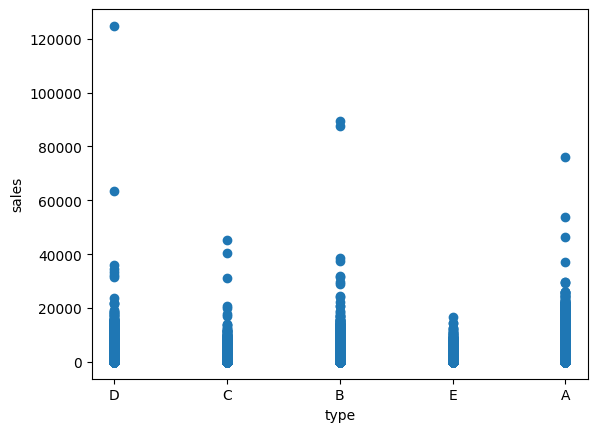

In [106]:
# Sales Vs Type
plt.scatter(train_df['type'], train_df['sales'])
plt.ylabel('sales')
plt.xlabel('type')
plt.show()

#### **Sales distribution of families**

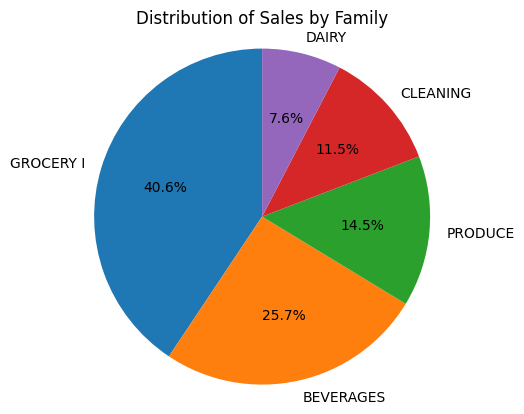

In [107]:
#Pie chart

# Group the data by family and calculate the total sales for each family
family_sales = train_df.groupby('family')['sales'].sum()
# Sort the families based on sales in descending order
family_sales_sorted = family_sales.sort_values(ascending=False)
# Get the top 5 families with the highest sales
top_families = family_sales_sorted.head(5)
# Create the pie chart
plt.pie(top_families, labels=top_families.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sales by Family')
plt.axis('equal')  
plt.show()

#### **Finding out top 10 Products corresponding to sales**

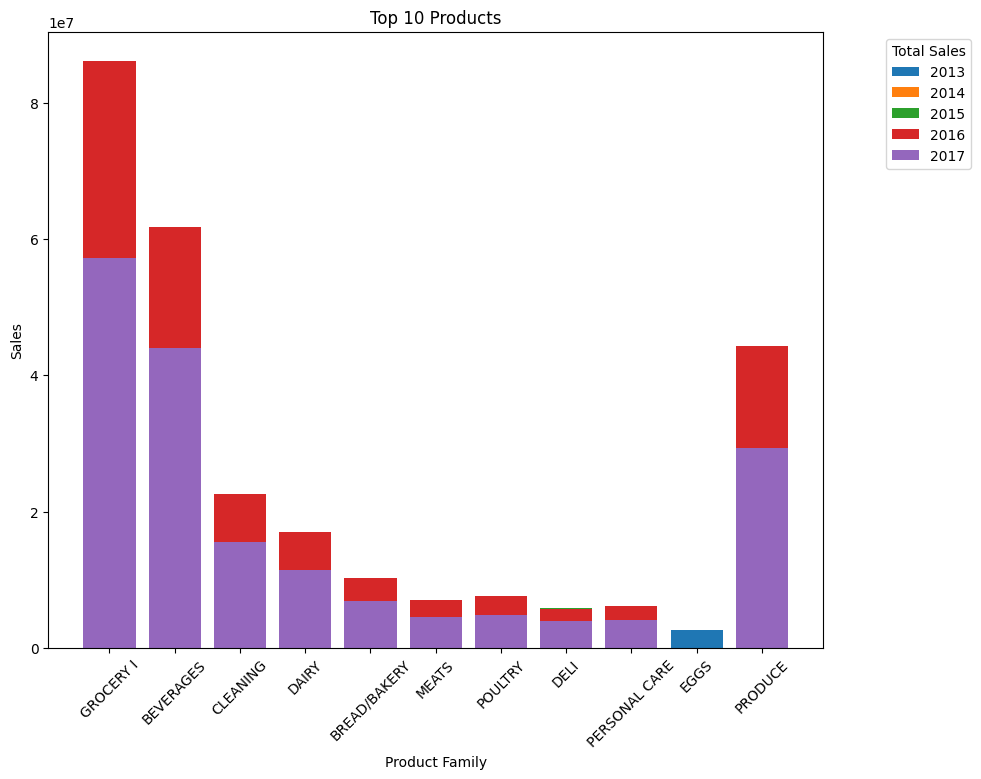

In [108]:
# convert the date column to datetime
train_df["date"] = pd.to_datetime(train_df["date"])
# extract the year from the date column
train_df["year"] = train_df["date"].dt.year

# group the data by year and product family and sum up the sales
sales_by_year_and_product = train_df.groupby(["year", "family"])["sales"].sum().reset_index()

# sort the data by year and sales in descending order
sales_by_year_and_product = sales_by_year_and_product.sort_values(by=["year", "sales"], ascending=[True, False])
fig, ax = plt.subplots(figsize=(10, 8))

# loop over the years and plot the top 10 products for each year
for year in sales_by_year_and_product["year"].unique():
    top_products = sales_by_year_and_product[sales_by_year_and_product["year"] == year].head(10)
    ax.bar(top_products["family"], top_products["sales"], label=str(year))

# set the axis labels and legend
ax.set_xlabel("Product Family")
ax.set_ylabel("Sales")
ax.legend(title="Total Sales", loc="upper right", bbox_to_anchor=(1.2, 1))

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# set the title and show the plot
ax.set_title("Top 10 Products")
plt.show()

#### **Can  promotion increase sales?**

#### Given that both of the variables are numerical, I will utilize the Pearson correlation test to ascertain the link between the two variables. The Pearson correlation coefficient, which runs from -1 to +1, calculates the linear connection between two continuous variables.

#### $H_0$ (>0.05) indicates Store sales are unaffected by the promotion.

#### $H_1$ (0.05) = Store sales are impacted by the promotion.

In [109]:
correlation, p_value = pearsonr(train_df['onpromotion'], train_df['sales'])
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.4279232048096143
p-value: 0.0


#### The null hypothesis ($H_0$) may be rejected based on the Pearson correlation coefficient of 0.4279 and the p-value of 0.0, which indicate that there is a substantial association between promotions and shop sales. Thus, the campaign does have an impact on retail sales.Now we will look at the scatterplot of promotion vs sales.  
---


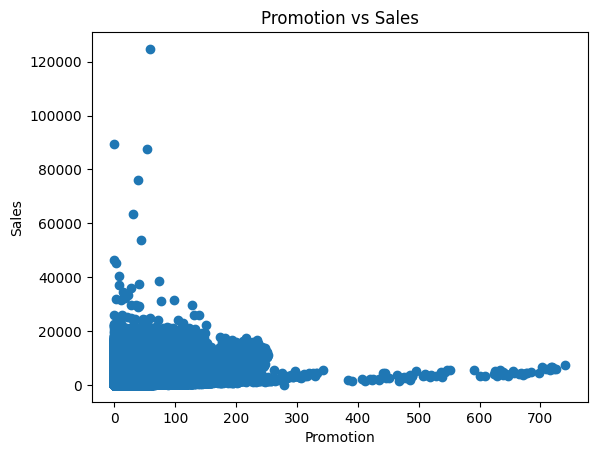

In [110]:
# Scatter plot of sales vs promotion
plt.scatter(train_df['onpromotion'], train_df['sales'])
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.title('Promotion vs Sales')
plt.show()

#### **Sales distribution of customers by cities.**

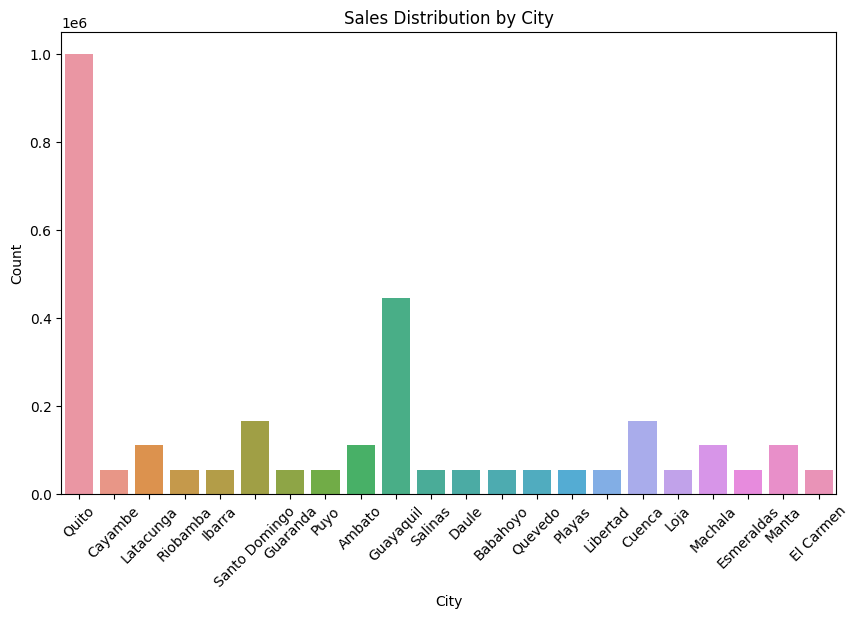

In [111]:
#Count Plot 
# Create a count plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=train_df, x='city')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Sales Distribution by City')

plt.xticks(rotation=45)

plt.show()

#### As we can see from the plot the city Quito has the maximum no of sales.  
--- 

#### **Sales distribution of customers by states.**

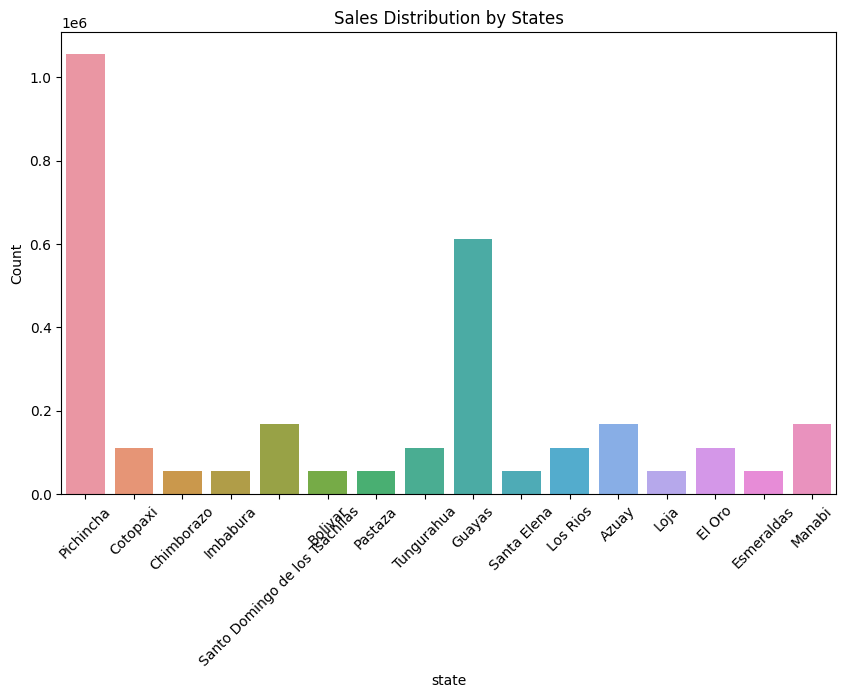

In [112]:
#Count Plot 
# Create a count plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=train_df, x='state')
plt.xlabel('state')
plt.ylabel('Count')
plt.title('Sales Distribution by States')
plt.xticks(rotation=45)
plt.show()

NameError: name 'holidays' is not defined

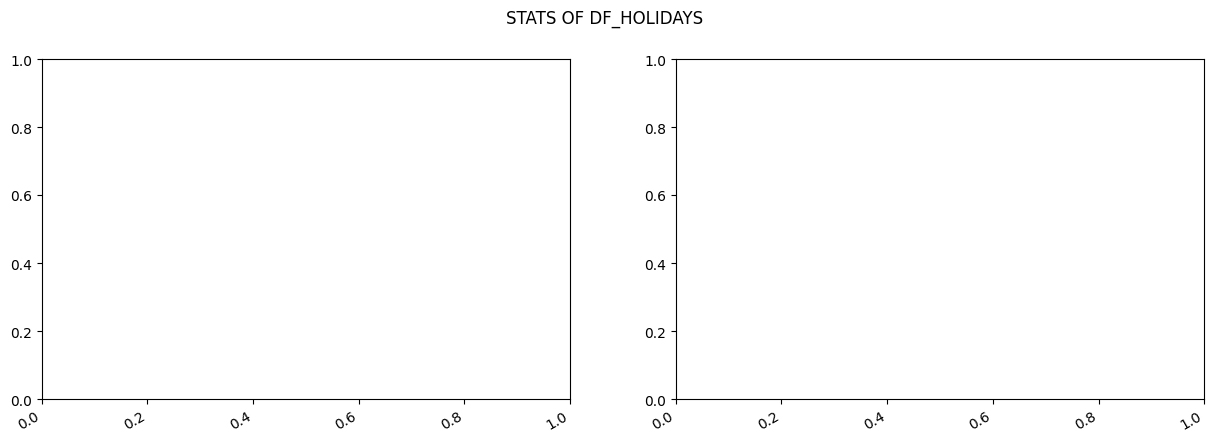

In [153]:
def plot_stats(df, column, ax,color,angle):
    count_classes = df[column].value_counts()
    ax = sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)
    ax.set_title(column.upper(), fontsize=20)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.autofmt_xdate()
fig.suptitle("Stats of df_holidays".upper())
plot_stats(holidays, "type", axes[0], "pastel", 45)
plot_stats(holidays, "locale", axes[1], "rocket", 45)
plt.show()

#### As we can see from the plot the city Pichincha has the maximum no of sales.  
---

#### **Finding out Which store has the maximum sales?**

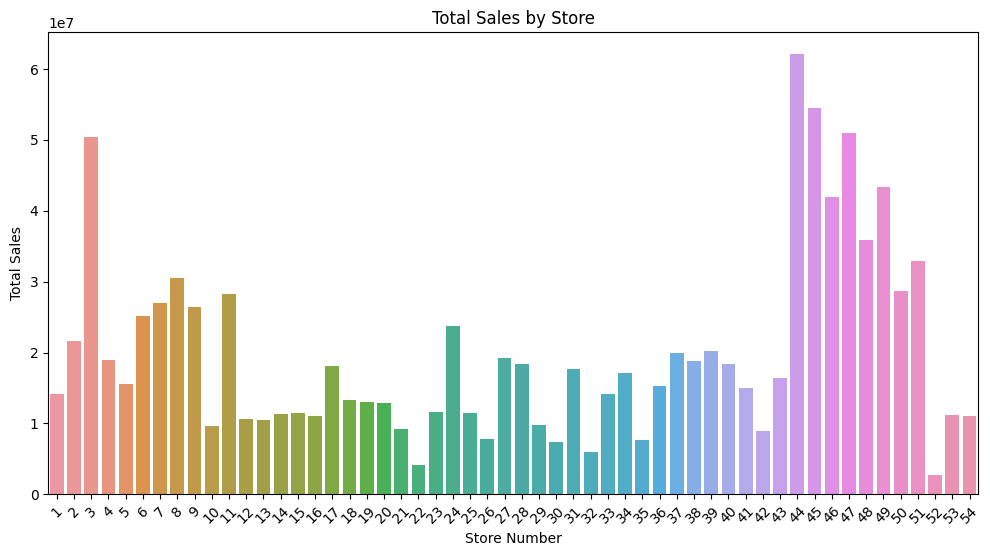

In [113]:
# Calculate the total sales for each store
store_sales = train_df.groupby('store_nbr')['sales'].sum().reset_index()
# Sort the stores based on sales in descending order
store_sales = store_sales.sort_values('sales', ascending=False)
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='store_nbr', y='sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.xticks(rotation=45)
plt.show()

#### As we can see from the plot store no 44 has the maximum sales .  
---

#### **Sales over time**

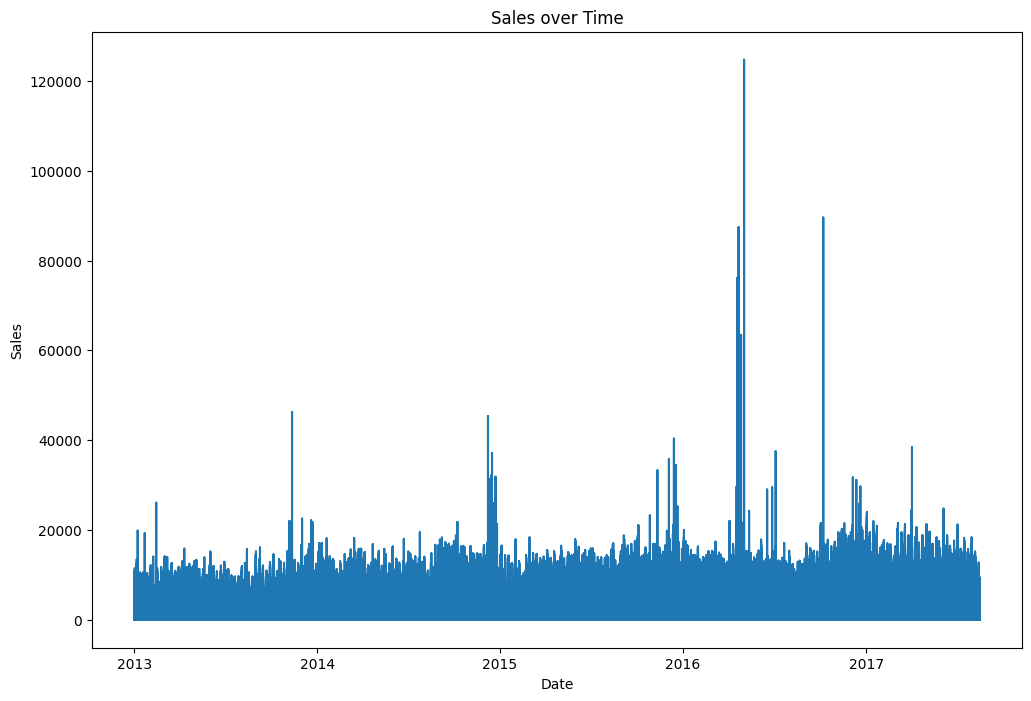

In [114]:
# Create a line chart
plt.figure(figsize=(12,8))
plt.plot(train_df['date'],train_df['sales'])
# Add title and axis labels
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
# Show the chart
plt.show()

#### **Finding out the month for which sales is maximum or minimum**

In [115]:
#First convert the 'date' from object to date time 
train_df['date']= pd.to_datetime(train_df['date'])
# create new columns 'month' 'year'
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

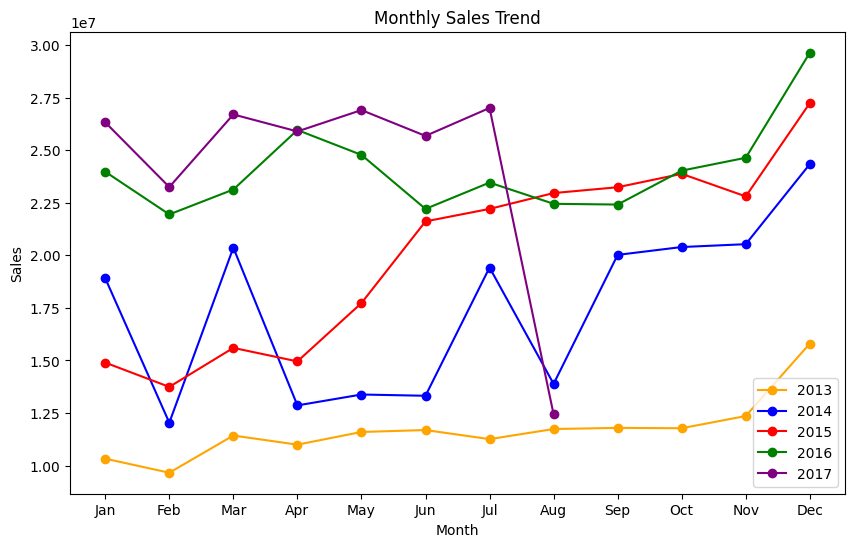

In [116]:
# Group the data by month, year, and calculate the total sales
monthly_sales = train_df.groupby(['month', 'year'])['sales'].sum().reset_index()
# Create the line chart
plt.figure(figsize=(10, 6))  # Set the figure size
# Get unique years and cycle through colors
years = monthly_sales['year'].unique()
colors = itertools.cycle(['orange', 'blue', 'red', 'green', 'purple'])
for year in years:
    year_data = monthly_sales[monthly_sales['year'] == year]
    plt.plot(year_data['month'], year_data['sales'], marker='o', color=next(colors), label=str(year))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
# Customize x-axis ticks to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)
plt.legend()
plt.show()

#### The green line, which represents 2016, has generally had sustained high sales from January through December. 2016's December had the biggest sales of all the months. On the other side, 2013 had the lowest overall sales totals compared to past years, particularly in February.  
---

In [117]:

train_df = train_df.groupby('date')[['sales', 'onpromotion']].sum().reset_index()
print(train_df)

           date          sales  onpromotion
0    2013-01-01    2511.618999            0
1    2013-01-02  496092.417944            0
2    2013-01-03  361461.231124            0
3    2013-01-04  354459.677093            0
4    2013-01-05  477350.121229            0
...         ...            ...          ...
1679 2017-08-11  826373.722022        14179
1680 2017-08-12  792630.535079         8312
1681 2017-08-13  865639.677471         9283
1682 2017-08-14  760922.406081         8043
1683 2017-08-15  762661.935939        10605

[1684 rows x 3 columns]


### **AutoCorrelation**

#### Autocorrelation refers to the correlation between a time series and a lagged version of itself. In simpler terms, it measures the relationship between an observation and its past observations.Now, let's consider the values of the autocorrelation function (ACF). The ACF is a plot that shows the correlation between a time series and its lagged values. It ranges from -1 to +1, with 0 indicating no correlation.  

- ACF = +1: When the ACF is +1, it implies a perfect positive autocorrelation. This means that there is a strong linear re
lationship between the current observation and its lagged values. In other words, if the current value is high, the lagged values are also high, and vice versa. This positive autocorrelation suggests a trend in the data, where the values tend to increase or decrease consistently over time.  

- ACF = -1: On the other hand, when the ACF is -1, it indicates a perfect negative autocorrelation. This means that there is a strong inverse relationship between the current observation and its lagged values. In this case, if the current value is high, the lagged values are low, and vice versa. This negative autocorrelation suggests a pattern of oscillation or cyclical behavior in the data.  

- ACF = 0: When the ACF is 0, it implies no autocorrelation. This means that the current observation is not related to its past values. In such cases, the data is considered to be random or independent. However, it is important to note that a zero ACF does not necessarily mean that the data is truly random. It could also indicate that the autocorrelation is too weak to be detected by the ACF plot.   

**In summary, autocorrelation is a useful concept in analyzing time series data. The ACF provides insights into the relationship between a time series and its lagged values. A positive ACF suggests a trend, a negative ACF indicates cyclical behavior, and a zero ACF implies no autocorrelation or weak correlation.**  

---

In [122]:
sales_series = train_df['sales']
autocorr_values = sales_series.autocorr()
print("Autocorrelation:", autocorr_values)

Autocorrelation: 0.7668836879523093


#### Autocorrelation is a statistical measure that quantifies the degree of similarity between a time series and a lagged version of itself. When the autocorrelation is 0.76, it indicates a strong positive correlation between the values of the time series at different lags.  


#### **In simpler terms, an autocorrelation of 0.76 suggests that there is a significant relationship between the current value of the time series and its past values. This positive autocorrelation implies that as the time series increases (or decreases), there is a higher likelihood that the subsequent values will also increase (or decrease) accordingly.**  
---

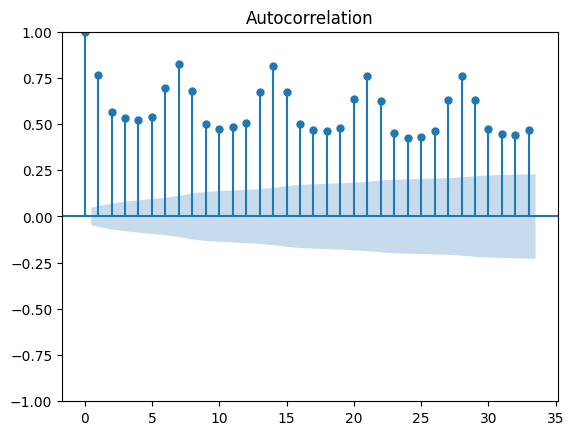

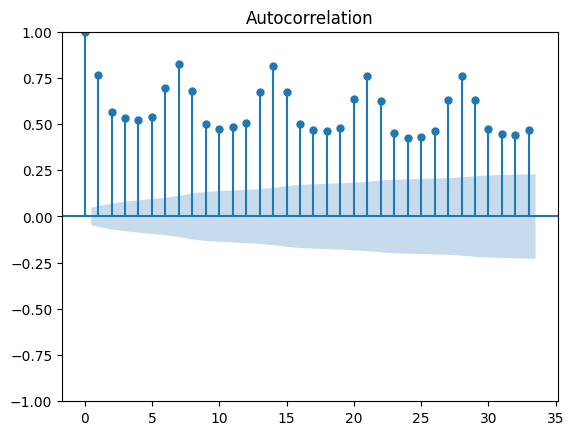

In [125]:
plot_acf(train_df['sales'])

### **Partial Autocorrelation**

#### The partial autocorrelation function is a statistical tool used to identify the direct relationship between a variable and its lagged values, while controlling for the influence of other variables. It is particularly useful in time series analysis, where we aim to understand the patterns and dependencies within a sequence of observations.  


The PACF can be interpreted as the direct effect of a specific lag on the current value of the variable, independent of the other lags. It helps us identify the significant lags that contribute to the autocorrelation structure of the time series.
By analyzing the PACF plot, we can determine the order of an autoregressive model (AR) and select the appropriate lag values. The significant PACF values indicate the number of significant lags to include in the model.

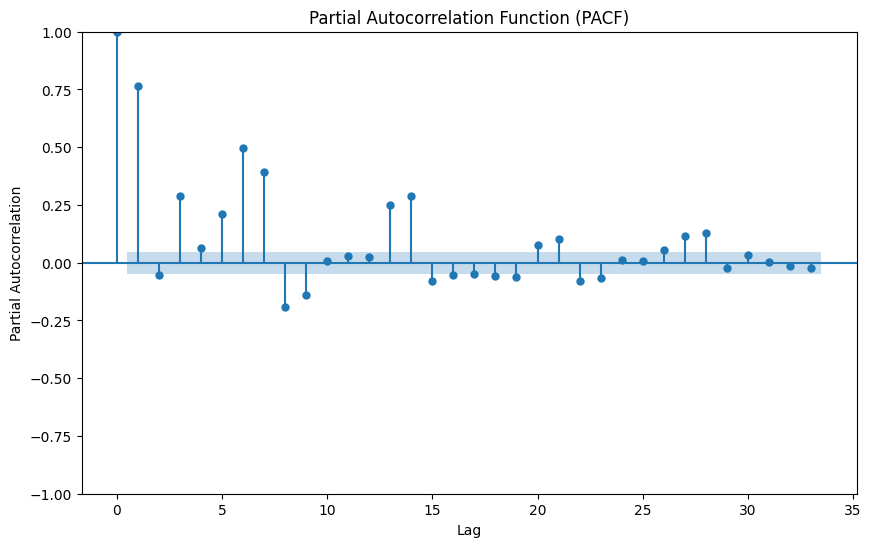

In [126]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(train_df['sales'], ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## **Testing for Stationarity**

#### **What is Stationarity**
Stationarity is an important assumption in many time series analysis techniques. It allows us to make reliable predictions and draw meaningful conclusions from the data. In a stationary time series, the mean remains constant, indicating that there is no long-term trend. Additionally, the variance remains constant, implying that the data points are spread out evenly around the mean.  

---

#### **Types of Stationarity**
There are different types of stationarity.   
- Strict stationarity requires that the joint distribution of any set of time points is invariant over time.  
-  Weak stationarity, on the other hand, only requires the mean and variance to be constant. In practice, weak stationarity is more commonly.  
assumed. 

---  


#### **Determining Stationarity**
To determine if a time series is stationary, we can perform statistical tests such as the Augmented Dickey-Fuller (ADF) test, Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test. If the p-value of the tests are below a certain threshold, we can reject the null hypothesis of non-stationarity and conclude that the series is stationary.
Why is stationarity important? Well, it simplifies the analysis and modeling of time series data. It allows us to use various forecasting techniques, such as autoregressive integrated moving average (ARIMA) models, with greater confidence.
In conclusion, understanding stationary time series is crucial for accurate time series analysis and forecasting. By ensuring stationarity, we can make reliable predictions and gain valuable insights from the data.  

---  


#### **Augmented Dickey- Fuller(ADF) Test**

#### The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or non-stationary. Stationarity is an important assumption in many time series analysis models.

#### **$H_0$:Time series has a unit root, indicating non-stationarity.**  

#### **$H_1:$ The time series is stationary.**  

---

#### When performing the Augmented Dickey-Fuller (ADF) test, we obtain the ADF statistic and the p-value. The ADF statistic is a negative number, and its magnitude indicates the strength of evidence against the null hypothesis of non-stationarity. The more negative the ADF statistic, the stronger the evidence against the null hypothesis.
#### On the other hand, the p-value represents the probability of observing the ADF statistic or a more extreme value if the null hypothesis were true. In the context of the ADF test, the null hypothesis assumes that the time series is non-stationary. Therefore, a low p-value suggests strong evidence against the null hypothesis and indicates that the time series is likely stationary. 
 
---
#### Typically, a significance level is chosen, such as 0.05, to determine the threshold for rejecting the null hypothesis. If the p-value is below this significance level, we reject the null hypothesis and conclude that the time series is stationary. Conversely, if the p-value is above the significance level, we fail to reject the null hypothesis and cannot conclude that the time series is stationary.

In [128]:
# define the time series as a pandas Series
ts = train_df['sales']

In [129]:
from statsmodels.tsa.stattools import adfuller
# assuming your time series data is stored in a variable called 'ts'
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.616196
p-value: 0.089696
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


 

##### The p-value is 0.081. This p-value represents the probability of observing an ADF statistic as extreme as or more extreme than the observed value under the null hypothesis of a unit root. In this case, the p-value is greater than the commonly chosen significance level of 0.05. This means that there is no strong evidence to reject the null hypothesis of a unit root and conclude that the time series is non-stationary.  
#### The critical values of the ADF test are provided for comparison with the observed ADF statistic. They indicate the threshold values that the ADF statistic needs to exceed in order to reject the null hypothesis of a unit root at different significance levels. In your case, the critical values at the 1%, 5%, and 10% levels are -3.434, -2.863, and -2.568, respectively. Since the observed ADF statistic is not  greater than the critical value at the 1% and 5% levels, we can  not reject the null hypothesis with 99% and 95% confidence, respectively.  
---

### **Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test**

#### The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test is a statistical test for the null hypothesis that an observable time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root.The KPSS test is based on the Lagrange multiplier test. The null hypothesis is that the time series can be represented by a deterministic trend and a stationary error term. The alternative hypothesis is that the time series has a unit root.  
#### Hypothesis for Kwiatkowski-Philips-Schmidt-Shin(KPSS) test:  
#### **$H_0$:The time series is stationary.** 

#### **$H_1$:The time series is non-stationary.**

#### The KPSS test is more powerful than some other unit root tests, such as the Augmented Dickey–Fuller test, in the presence of a deterministic trend. However, it is less powerful in the presence of a stochastic trend.  
---

In [130]:
result = kpss(ts)
# Extract and print the test statistic and p-value
kpss_statistic = result1[0]
p_value = result1[1]
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 5.737661
p-value: 0.010000


#### Here also as the p value is 0.01 which is less than 0.05 we reject our null hypothesis that the time series is stationary.  
**We conclude that the time series is non stationary.**

## **Differncing Technique**

#### In time series analysis, a stationary series is one whose statistical properties, such as mean and variance, remain constant over time. On the other hand, a non-stationary series exhibits trends, seasonality, or other patterns that change over time. To make a non-stationary series stationary, we can apply differencing.  
**Differencing involves computing the differences between consecutive observations in a time series. The first-order differencing is obtained by subtracting each observation from its previous one. This process eliminates the trend component of the series, resulting in a stationary series. If the first-order differencing is not sufficient to achieve stationarity, we can apply higher-order differencing by repeating the differencing process.**   

---

Text(0.5, 1.0, 'Residual Plot')

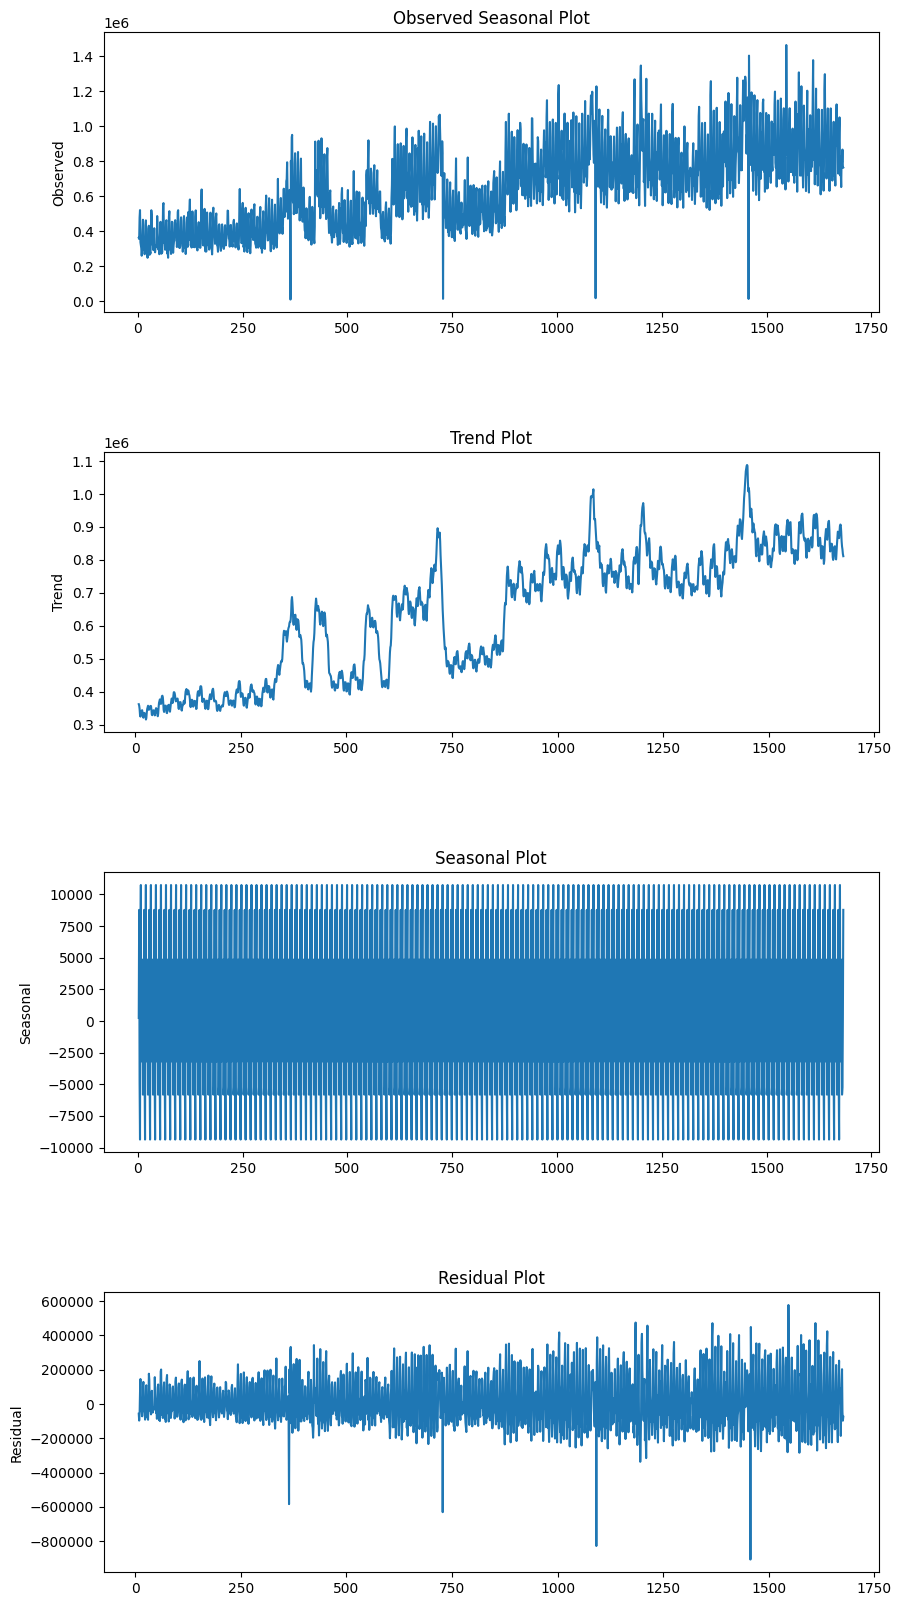

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

# decompose the time series
decomposition = seasonal_decompose(train_df['sales'], model='additive', period=12)

# create a seasonal plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5) # added space between subplots

decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
axes[0].set_title('Observed Seasonal Plot')

decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
axes[1].set_title('Trend Plot')

decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Seasonal Plot')

decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
axes[3].set_title('Residual Plot')

As we can see, the series has some seasonal pattern and a strong correlation between the current value and the historical value. This correlation prevents white noise from appearing in the series. The following value in an autocorrelation, however, is also the present if the previous value was linked with it. To do this, we must examine partial autocorrelations since, in doing so, we can get rid of the influence of previous values on the next value.

In [131]:
train_df['diff_sales'] = train_df['sales'].diff()

In [132]:
train_df = train_df.dropna()

In [133]:
print(train_df['diff_sales'])

1       493580.798945
2      -134631.186820
3        -7001.554031
4       122890.444136
5        42345.279859
            ...      
1679    174986.810052
1680    -33743.186943
1681     73009.142392
1682   -104717.271390
1683      1739.529858
Name: diff_sales, Length: 1683, dtype: float64


In [134]:
train_df['diff_sales'] = train_df['sales'] - train_df['sales'].shift(1)

In [135]:
# Drop the first row since differencing introduces a NaN value
train_df = train_df.dropna()

In [136]:
print(train_df['diff_sales'])

2      -134631.186820
3        -7001.554031
4       122890.444136
5        42345.279859
6      -183572.600022
            ...      
1679    174986.810052
1680    -33743.186943
1681     73009.142392
1682   -104717.271390
1683      1739.529858
Name: diff_sales, Length: 1682, dtype: float64


In [137]:
train_df.head()

,date,sales,onpromotion,diff_sales
2,2013-01-03,361461.231124,0,-134631.186820
3,2013-01-04,354459.677093,0,-7001.554031
4,2013-01-05,477350.121229,0,122890.444136
5,2013-01-06,519695.401088,0,42345.279859
6,2013-01-07,336122.801066,0,-183572.600022


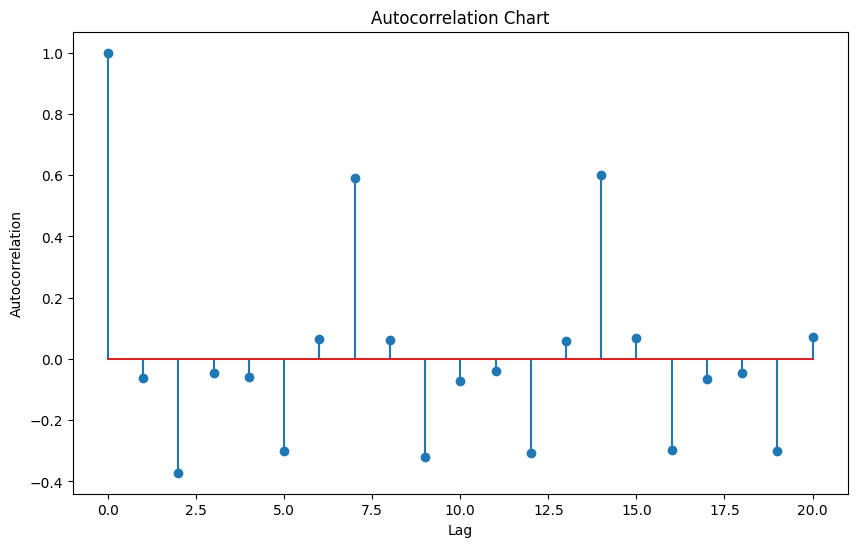

In [138]:
# Compute the autocorrelation
autocorrelation = sm.tsa.acf(train_df['diff_sales'], nlags=20)
# Plot the autocorrelation chart
plt.figure(figsize=(10, 6))
plt.stem(range(len(autocorrelation)), autocorrelation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Chart')
plt.show()

## **Checking for stationarity after differncing**

In [139]:
ts = train_df['diff_sales']

In [140]:
# Perform the ADF test
result = adfuller(ts)
# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -11.494679187188847
p-value: 4.645171054100762e-21


#### We  got  -11.494679187188824 as ADF statistic after differncing. This statistic has a negative value and is less negative than the standard significance levels' critical values. This indicates compelling evidence that the time series is stationary and strongly refutes the null hypothesis of a unit root.

#### The p-value is 4.645171054101398e-21, a very low number that is very near to zero. Typically, significant evidence to reject the null hypothesis is shown if the p-value is below the selected significance level (for example, 0.05). In your situation, the incredibly low p-value supports the stationarity of the time series and provides strong evidence against the occurrence of a unit root.  
---

In [141]:
result = kpss(ts)

# Extract and print the test statistic and p-value
kpss_statistic = result[0]
p_value = result[1]
print("KPSS Statistic:", kpss_statistic)
print("p-value:", p_value)

KPSS Statistic: 0.026854877460035433
p-value: 0.1


#### 0.02685487746003539 is the KPSS statistic after differencing. The difference between the observed series and the series' trend is captured by this statistic. It shows how far the series strays from stationary behavior. A lower KPSS value indicates a better fit to stationarity.

#### The p-value is 0.1, matching the 0.1 significance level that was selected. If the p-value exceeds the significance level, it typically means that there is not enough data to disprove the null hypothesis of stationarity. The results are inconclusive because the p-value is equal to the significance level given the outcome.  
---

#### **Final ACF & PACF**

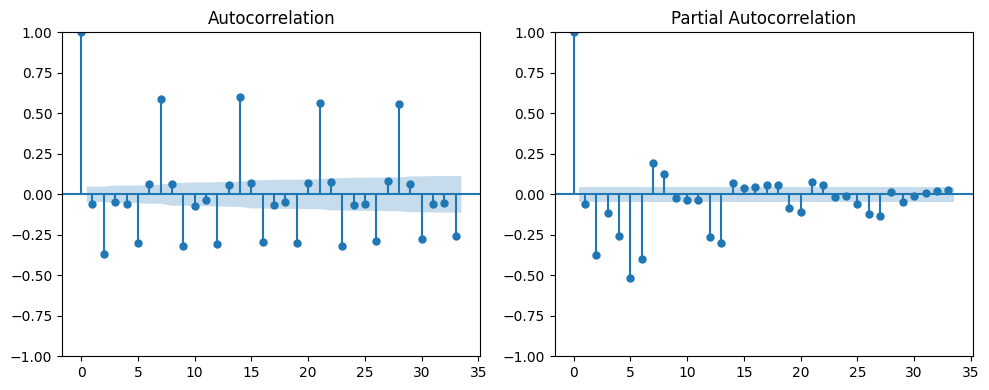

In [143]:
#Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(121)
plot_acf(train_df['diff_sales'], ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
ax2 = plt.subplot(122)
plot_pacf(train_df['diff_sales'], ax=ax2)

plt.tight_layout()
plt.show()

## **Autoregressive Integrated Moving Average Model**

In [154]:
# Define the order of differencing, AR, and MA terms
p = 2

d = 1 

q = 1

In [157]:
train_np = train_df['diff_sales'].values.astype('float64')
model = sm.tsa.ARIMA(train_np, order=(p, d, q))

result = model.fit()

In [158]:
# Print the model summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1682
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -22466.312
Date:                Sun, 27 Aug 2023   AIC                          44940.623
Time:                        21:55:50   BIC                          44962.332
Sample:                             0   HQIC                         44948.664
                               - 1682                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0844      0.024     -3.458      0.001      -0.132      -0.037
ar.L2         -0.3759      0.027    -14.179      0.000      -0.428      -0.324
ma.L1         -0.9992      0.036    -27.920      0.0

In [159]:
# Make predictions
start_idx = len(train_np)
end_idx = len(train_np) + len(test_df) - 1
predictions = result.predict(start=start_idx, end=end_idx)

# Print the predictions
print(predictions)

[ 39458.17476474  -3743.25518584 -14277.47451582 ...    164.19214592
    164.19214592    164.19214592]


In [160]:
start_idx

1682

In [161]:
actual_values = train_df['diff_sales']

In [162]:
# Truncate or pad the predictions array to match the length of actual_values
predictions = predictions[:len(actual_values)]

# Calculate evaluation metrics
mae = np.mean(np.abs(predictions - actual_values))
mse = np.mean((predictions - actual_values) ** 2)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 116113.50309173285
Mean Squared Error (MSE): 25441765267.716763
Root Mean Squared Error (RMSE): 159504.74998481004


## **Submission**

In [ ]:
submission = pd.DataFrame()
submission['id'] = test_df['id'] 
submission['sales'] = np.zeros(len(test_df))

# save the submission file as a CSV file
submission.to_csv('mysubmission.csv', index=False)